In [25]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

1. Check which version of the game is better by computing average ”sum gamerounds”.
2. To check that the difference in average of ”sum gamerounds” is by chance or it is a real
difference, perform the permutation Resampling on the data and derive the probability. Make
the decision based on derived probability.

In [28]:
df = pd.read_csv("cookie_cats.csv")
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [6]:
mu_a = df[df['version'] == 'gate_30'].sum_gamerounds.mean()
mu_b = df[df['version'] == 'gate_40'].sum_gamerounds.mean()

In [7]:
print("Mean sum of gamerounds gate_30 : ", mu_a)
print("Mean sum of gamerounds gate_40 : ", mu_b)
print("Difference Between average of sum of gamerounds : ", mu_a - mu_b)

Mean sum of gamerounds gate_30 :  52.1794932233353
Mean sum of gamerounds gate_40 :  50.28428898409531
Difference Between average of sum of gamerounds :  1.8952042392399875


Text(0.5, 1.0, 'Sum of Gamegrounds')

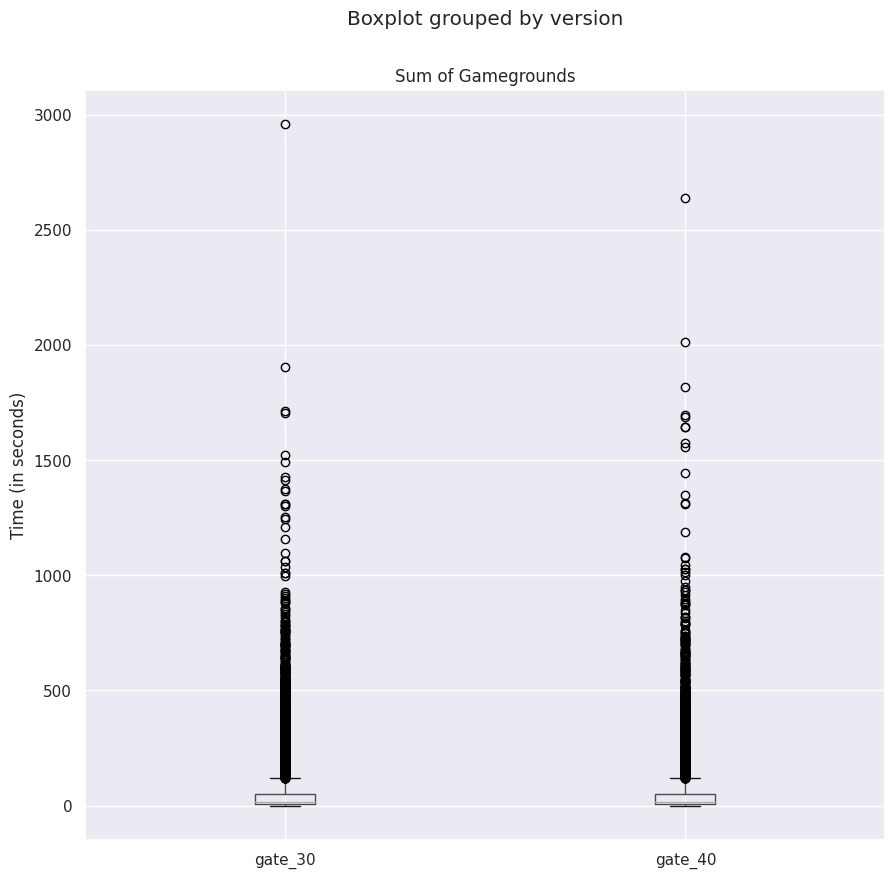

In [10]:
ax = df.boxplot(by='version', column='sum_gamerounds')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.title('Sum of Gamegrounds')

In [16]:
import random

def permutatation_test_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_A].mean() - x.loc[idx_B].mean()

In [17]:
nA= len(df[df['version'] == 'gate_30'])
nA

16970

In [18]:
nB=len(df[df['version'] == 'gate_40'])
nB

17039

In [19]:
permutation_difference = [permutatation_test_fun(df.sum_gamerounds, nA, nB) for _ in range(500)]

<ipython-input-16-c96e11aa9f21>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_A].mean() - x.loc[idx_B].mean()
<ipython-input-16-c96e11aa9f21>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_A].mean() - x.loc[idx_B].mean()
<ipython-input-16-c96e11aa9f21>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_A].mean() - x.loc[idx_B].mean()
<ipython-input-16-c96e11aa9f21>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_A].mean() - x.loc[idx_B].mean()
<ipython-input-16-c96e11aa9f21>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_A].mean() - x.loc[idx_B].mean()
<ipyt

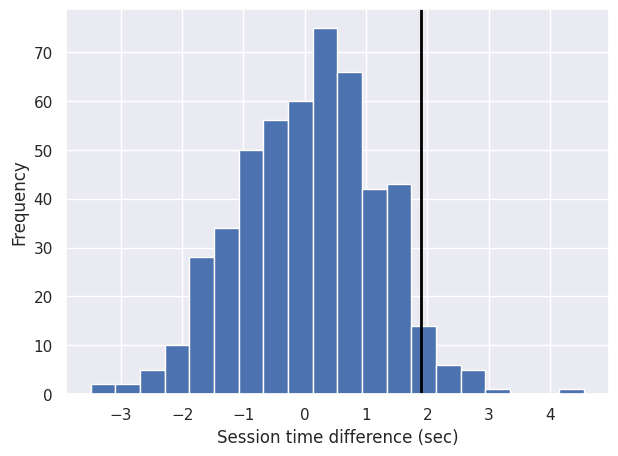

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(permutation_difference, bins=20, rwidth=1)

# original mean difference
ax.axvline(x= mu_a -mu_b, color='black', lw=2)

ax.set_xlabel('Session time difference (sec)')
ax.set_ylabel('Frequency')
plt.show()

In [26]:
numpy.mean(permutation_difference > mu_a - mu_b)

0.038